In [733]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Pip install selenium and beautifulsoup4. Then download
# ChromeDriver https://sites.google.com/a/chromium.org/chromedriver/downloads

In [759]:
from bs4 import BeautifulSoup
from selenium import webdriver

# replace this with the path of where you downloaded chromedriver
chromedriver_path = "/Users/alexcombs/Downloads/chromedriver"

browser = webdriver.Chrome(chromedriver_path)

In [760]:
sats = 'https://www.google.com/flights/?f=0#f=0&flt=/m/02_286.r/m/02j9z.2018-12-01*r/m/02j9z./m/02_286.2018-12-08;c:USD;e:1;s:0*1;sd:1;t:e'

In [761]:
browser.get(sats)

In [757]:
browser.title

'Google Flights'

In [758]:
browser.save_screenshot('/Users/alexcombs/Desktop/test_flights.png')

True

In [183]:
from IPython.core.display import HTML

In [184]:
HTML(browser.page_source)

In [762]:
from bs4 import BeautifulSoup

In [186]:
soup = BeautifulSoup(browser.page_source, "html5lib")

In [187]:
cards = soup.select('div[class*=info-container]')

In [188]:
cards[0]

<div class="sssAPt3XrOA__info-container"><h3 class="sssAPt3XrOA__title aria-punctuation-after" jsan="7.sssAPt3XrOA__title,7.aria-punctuation-after" jstcache="5723">London</h3><div jstcache="5724" style="display:none"></div><destination-price-summary jstcache="5725"><div class="tD5kazVERD1__first-flight-row tD5kazVERD1__flight-row" jsan="7.tD5kazVERD1__first-flight-row,t-z-b82lC7-Tw,7.tD5kazVERD1__flight-row,21.jssc" jstcache="5732"><span class="gws-flights__ellipsize"><span class="aria-punctuation-after" jsan="7.aria-punctuation-after,t-eIHViHXtbak,21.jssc" jstcache="5736">Nonstop</span><span class="tD5kazVERD1__timing" jsan="7.tD5kazVERD1__timing,t-9OG0n4dH-E8" jstcache="5737" style=""><span aria-hidden="true"> · </span><span jstcache="5745">6h 30m</span></span><span jstcache="5738" style="display:none"></span></span><span class="tD5kazVERD1__price aria-punctuation-after tD5kazVERD1__cheapest-price" jsan="7.tD5kazVERD1__price,7.aria-punctuation-after,7.tD5kazVERD1__cheapest-price" jst

In [190]:
for card in cards:
    print(card.select('h3')[0].text)
    print(card.select('span[class*=price]')[0].text)
    print('\n')

London
$331


Paris
$319


Rome
$406


Reykjavik
$360


Barcelona
$370


Amsterdam
$353


Madrid
$361


Dublin
$483


Athens
$1,016


Milan
$557


Lisbon
$669


Frankfurt
$722


Moscow
$568


Berlin
$1,248


Istanbul
$889


Copenhagen
$575


Nice



Zürich
$520


Venice



Munich
$1,017




In [ ]:
# we'll get fares for all saturday to saturday flights to europe for the next 10 weeks
# we'll then create a time series and look for outliers

In [275]:
from datetime import date, timedelta
from time import sleep

In [414]:
start_sat = '2018-12-01'
end_sat = '2018-12-08'

start_sat_date = datetime.strptime(start_sat, '%Y-%m-%d')
end_sat_date = datetime.strptime(end_sat, '%Y-%m-%d')

fare_dict = {}

for i in range(26):    
    sat_start = str(start_sat_date).split()[0]
    sat_end = str(end_sat_date).split()[0]
    
    fare_dict.update({sat_start: {}})
    
    sats = "https://www.google.com/flights/?f=0#f=0&flt=/m/02_286.r/m/02j9z." + \
    sat_start + "*r/m/02j9z./m/02_286." + \
    sat_end + ";c:USD;e:1;s:0*1;sd:1;t:e"
    
    sleep(np.random.randint(3,7))
    
    browser.get(sats)
    
    soup = BeautifulSoup(browser.page_source, "html5lib")
    
    cards = soup.select('div[class*=info-container]')
    
    for card in cards:
        city = card.select('h3')[0].text
        fare = card.select('span[class*=price]')[0].text
        fare_dict[sat_start] = {**fare_dict[sat_start], **{city: fare}}
        
    start_sat_date = start_sat_date + timedelta(days=7)
    end_sat_date = end_sat_date + timedelta(days=7)

In [763]:
fare_dict

{'2018-12-01': {'London': '$331',
  'Paris': '$319',
  'Rome': '$406',
  'Reykjavik': '$360',
  'Barcelona': '$370',
  'Amsterdam': '$353',
  'Madrid': '$361',
  'Dublin': '$483',
  'Athens': '$1,016',
  'Milan': '$557',
  'Lisbon': '$669',
  'Frankfurt': '$722',
  'Moscow': '$568',
  'Berlin': '$1,248',
  'Istanbul': '$889',
  'Copenhagen': '$575',
  'Zürich': '$520',
  'Munich': '$1,017',
  'Manchester': '$888',
  'Kiev': '$750'},
 '2018-12-08': {'London': '$331',
  'Paris': '$319',
  'Rome': '$406',
  'Reykjavik': '$360',
  'Barcelona': '$370',
  'Amsterdam': '$353',
  'Madrid': '$361',
  'Dublin': '$483',
  'Athens': '$1,016',
  'Milan': '$557',
  'Lisbon': '$669',
  'Frankfurt': '$722',
  'Moscow': '$568',
  'Berlin': '$1,248',
  'Istanbul': '$889',
  'Copenhagen': '$575',
  'Zürich': '$520',
  'Munich': '$1,017',
  'Manchester': '$888',
  'Kiev': '$750'},
 '2018-12-15': {'London': '$454',
  'Paris': '$295',
  'Rome': '$383',
  'Reykjavik': '$260',
  'Barcelona': '$510',
  'Amster

In [914]:
city_key = 'Milan'
for key in fare_dict:
    print(key, fare_dict[key][city_key])

2018-12-01 $557
2018-12-08 $557
2018-12-15 $557
2018-12-22 $1,072
2018-12-29 $1,221
2019-01-05 $1,003
2019-01-12 $1,003
2019-01-19 $938
2019-01-26 $938
2019-02-02 $938
2019-02-09 $938
2019-02-16 $938
2019-02-23 $938
2019-03-02 $938
2019-03-09 $938
2019-03-16 $938
2019-03-23 $938
2019-03-30 $938
2019-04-06 $938
2019-04-13 $938
2019-04-20 $938
2019-04-27 $938
2019-05-04 $938
2019-05-11 $938
2019-05-18 $938
2019-05-25 $978


In [915]:
city_dict = {}
for k,v in fare_dict.items():
    city_dict.update({k:int(v[city_key].replace(',','').split('$')[1])})

In [916]:
city_dict

{'2018-12-01': 557,
 '2018-12-08': 557,
 '2018-12-15': 557,
 '2018-12-22': 1072,
 '2018-12-29': 1221,
 '2019-01-05': 1003,
 '2019-01-12': 1003,
 '2019-01-19': 938,
 '2019-01-26': 938,
 '2019-02-02': 938,
 '2019-02-09': 938,
 '2019-02-16': 938,
 '2019-02-23': 938,
 '2019-03-02': 938,
 '2019-03-09': 938,
 '2019-03-16': 938,
 '2019-03-23': 938,
 '2019-03-30': 938,
 '2019-04-06': 938,
 '2019-04-13': 938,
 '2019-04-20': 938,
 '2019-04-27': 938,
 '2019-05-04': 938,
 '2019-05-11': 938,
 '2019-05-18': 938,
 '2019-05-25': 978}

In [917]:
prices = [int(x) for x in city_dict.values()]
dates = city_dict.keys()

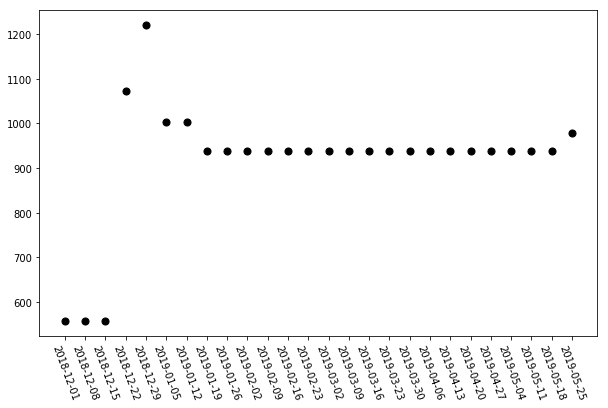

In [918]:
fig,ax = plt.subplots(figsize=(10,6))
plt.scatter(dates, prices, color='black', s=50)
ax.set_xticklabels(dates, rotation=-70);

In [919]:
from PyAstronomy import pyasl

Total Outliers: 3
Outlier Dates dict_keys(['2018-12-01', '2018-12-08', '2018-12-15']) 

     R         Lambda
 1   2.51476   2.98566
 2   2.96716   2.96529
 3   3.80581   2.94376


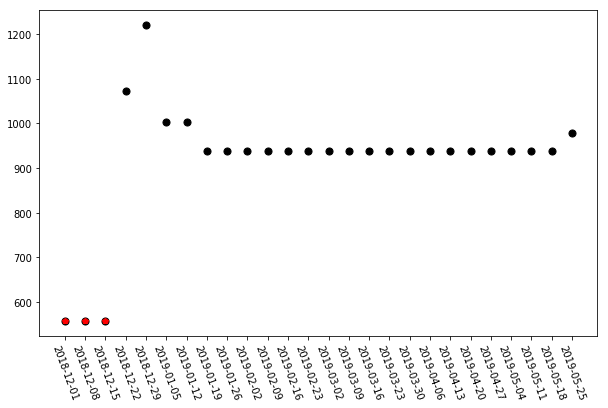

In [920]:
r = pyasl.generalizedESD(prices, 3, 0.025, fullOutput=True)

print('Total Outliers:', r[0])

out_dates = {}
for i in sorted(r[1]):
    out_dates.update({list(dates)[i]: list(prices)[i]})

print('Outlier Dates', out_dates.keys(), '\n')
print('     R         Lambda')

for i in range(len(r[2])):
    print('%2d  %8.5f  %8.5f' % ((i+1), r[2][i], r[3][i]))

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(dates, prices, color='black', s=50)
ax.set_xticklabels(dates, rotation=-70);

for i in range(r[0]):
    plt.plot(r[1][i], prices[r[1][i]], 'rp')

In [921]:
city_mean = np.mean(list(city_dict.values()))

In [922]:
for k,v in out_dates.items():
    if v < city_mean:
        print('Alert for', city_key + '!')
        print('Fare: $' + str(v), 'on', k)
        print('\n')

Alert for Milan!
Fare: $557 on 2018-12-01


Alert for Milan!
Fare: $557 on 2018-12-08


Alert for Milan!
Fare: $557 on 2018-12-15




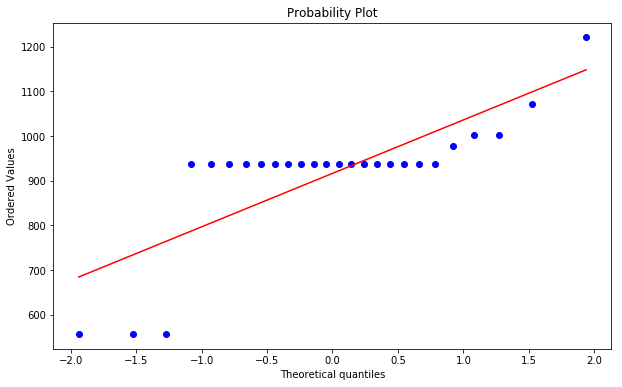

In [887]:
from scipy import stats
fix, ax = plt.subplots(figsize=(10,6))
stats.probplot(list(city_dict.values()), plot=plt)
plt.show()